In [219]:
import pandas as pd
import pyodbc

## Import data from SQL Server

In [220]:
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=.;DATABASE=sakila;Trusted_Connection=yes') 

In [221]:
query = "SELECT * FROM rental"
rental = pd.read_sql(query, conn)
print(rental.shape)

query = "SELECT * FROM payment"
payment = pd.read_sql(query, conn)
print(payment.shape)

query = "SELECT * FROM customer"
customer = pd.read_sql(query, conn)
print(customer.shape)

C:\Users\buidu\AppData\Local\Temp\ipykernel_1136\3298116425.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rental = pd.read_sql(query, conn)


(16044, 7)


C:\Users\buidu\AppData\Local\Temp\ipykernel_1136\3298116425.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  payment = pd.read_sql(query, conn)


(16049, 7)
(599, 9)


C:\Users\buidu\AppData\Local\Temp\ipykernel_1136\3298116425.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer = pd.read_sql(query, conn)


In [222]:
rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1346,2005-06-15 12:39:52,4540,585,2005-06-24 17:43:52,1,2006-02-15 21:30:53
1,1347,2005-06-15 12:43:43,374,190,2005-06-16 09:55:43,1,2006-02-15 21:30:53
2,1348,2005-06-15 12:45:30,2078,196,2005-06-17 17:12:30,1,2006-02-15 21:30:53
3,1349,2005-06-15 12:49:02,1131,267,2005-06-17 15:20:02,1,2006-02-15 21:30:53
4,1350,2005-06-15 12:50:25,4261,316,2005-06-23 11:35:25,1,2006-02-15 21:30:53


In [223]:
payment.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,2,1,1,573.0,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,3,1,1,1185.0,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,4,1,2,1422.0,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,5,1,2,1476.0,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30


In [224]:
customer.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20


## Integrate data for dimension and fact tables

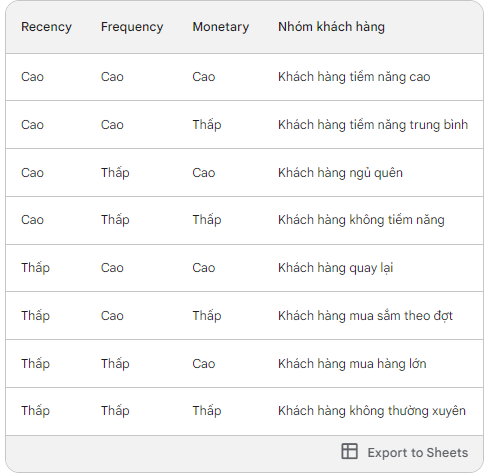

* Rental Dimension

In [225]:
dimRental = rental.merge(right=payment, on='rental_id', how='inner', 
                         suffixes=('', '_ren')).drop(columns=['customer_id','customer_id_ren','staff_id_ren','last_update_ren','last_update','inventory_id'])

In [228]:
dimRental.head()

,rental_id,rental_date,return_date,staff_id,payment_id,amount,payment_date
0,1346,2005-06-15 12:39:52,2005-06-24 17:43:52,1,15667,7.99,2005-06-15 12:39:52
1,1347,2005-06-15 12:43:43,2005-06-16 09:55:43,1,5152,2.99,2005-06-15 12:43:43
2,1348,2005-06-15 12:45:30,2005-06-17 17:12:30,1,5286,2.99,2005-06-15 12:45:30
3,1349,2005-06-15 12:49:02,2005-06-17 15:20:02,1,7213,4.99,2005-06-15 12:49:02
4,1350,2005-06-15 12:50:25,2005-06-23 11:35:25,1,8558,4.99,2005-06-15 12:50:25


* Customer Dimension

In [226]:
customer['full_name'] = customer['first_name'] + ' ' + customer['last_name']
customer.drop(columns=['first_name','last_name','email','create_date'], axis=1, inplace=True)
dimCustomer = customer.copy()

In [227]:
dimCustomer.head()

,customer_id,store_id,address_id,active,last_update,full_name
0,1,1,5,1,2006-02-15 04:57:20,MARY SMITH
1,2,1,6,1,2006-02-15 04:57:20,PATRICIA JOHNSON
2,3,1,7,1,2006-02-15 04:57:20,LINDA WILLIAMS
3,4,2,8,1,2006-02-15 04:57:20,BARBARA JONES
4,5,1,9,1,2006-02-15 04:57:20,ELIZABETH BROWN


* Segment Fact Table

In [229]:
temp = customer.merge(right=rental, on='customer_id', how='inner', suffixes=('', '_ren'))
factSegment = temp.merge(right=payment, on='rental_id', how='inner', suffixes=('', 'pay'))
factSegment = factSegment[['customer_id','active','full_name','rental_id','payment_id','amount','rental_date']]

factSegment.head()

,customer_id,active,full_name,rental_id,payment_id,amount,rental_date
0,1,1,MARY SMITH,1422,4,0.99,2005-06-15 18:02:53
1,1,1,MARY SMITH,1476,5,9.99,2005-06-15 21:08:46
2,1,1,MARY SMITH,1725,6,4.99,2005-06-16 15:18:57
3,1,1,MARY SMITH,2308,7,4.99,2005-06-18 08:41:48
4,1,1,MARY SMITH,2363,8,0.99,2005-06-18 13:33:59


* Monetary measure

In [230]:
data = set()
for ids, val in factSegment.groupby('customer_id').aggregate({'amount':'sum'}).amount.to_dict().items():
    data.add((ids, val))
m_val = pd.DataFrame(data).rename(columns={0: "customer_id", 1:"monetary"})

factSegment = factSegment.merge(right=m_val, on='customer_id', how='inner')

* Frequency measure

In [231]:
data = set()
for ids, val in factSegment.groupby('customer_id').aggregate({'payment_id':'count'}).payment_id.to_dict().items():
    data.add((ids, val))
freq = pd.DataFrame(data).rename(columns={0: "customer_id", 1:"frequency"})

factSegment = factSegment.merge(right=freq, on='customer_id', how='inner')

In [232]:
factSegment.head()

,customer_id,active,full_name,rental_id,payment_id,amount,rental_date,monetary,frequency
0,1,1,MARY SMITH,1422,4,0.99,2005-06-15 18:02:53,118.68,32
1,1,1,MARY SMITH,1476,5,9.99,2005-06-15 21:08:46,118.68,32
2,1,1,MARY SMITH,1725,6,4.99,2005-06-16 15:18:57,118.68,32
3,1,1,MARY SMITH,2308,7,4.99,2005-06-18 08:41:48,118.68,32
4,1,1,MARY SMITH,2363,8,0.99,2005-06-18 13:33:59,118.68,32


## Dump dimensions and fact to csv files

In [233]:
dimCustomer.to_csv('./data/tables/dimCustomer.csv', index_label='customer_key')
dimRental.to_csv('./data/tables/dimRental.csv', index_label='rental_key')
factSegment.to_csv('./data/tables/factSegment.csv')